In [165]:
import robin_stocks as r
import trading_algorithms as m 
import financial as f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [166]:
#algorithm for long hold stocks 
#for long hold stocks, only buy when the price is lower that the target price
#and sell when the its diversity over the credential



In [173]:
#calculate 30days ave move and 10 days ave move
#if 10days < 30 days ,trigger buy
tker = 'TAN'
X = f.requestHistoryStockPriceByDay(tker,200)
Y = []
Z = []
for item in X:
    Y.append(item['close'])
    Z.append(item['date'])
Data = pd.DataFrame(Y[::-1],columns={'price'})
date = pd.DataFrame(Z[::-1],columns={'date'})



           date      price      10ave      30ave      10/30
30   2020-03-09  31.930000  36.846000  36.284667   1.547026
31   2020-03-10  33.100000  36.374000  36.324000   0.137650
32   2020-03-11  30.970000  35.681000  36.264667  -1.609464
33   2020-03-12  26.550000  34.687000  36.047333  -3.773742
34   2020-03-13  27.170000  33.757000  35.850000  -5.838215
35   2020-03-16  22.800000  32.338000  35.538333  -9.005299
36   2020-03-17  24.500000  31.075000  35.268667 -11.890630
37   2020-03-18  22.250000  29.448000  34.870333 -15.549990
38   2020-03-19  23.000000  27.915000  34.478000 -19.035327
39   2020-03-20  22.750000  26.502000  34.065000 -22.201673
40   2020-03-23  22.220000  25.531000  33.646000 -24.118766
41   2020-03-24  25.220000  24.743000  33.313667 -25.727179
42   2020-03-25  26.400000  24.286000  32.974000 -26.348032
43   2020-03-26  27.160000  24.347000  32.601333 -25.319005
44   2020-03-27  24.970000  24.127000  32.178000 -25.020200
45   2020-03-30  25.140000  24.361000  3

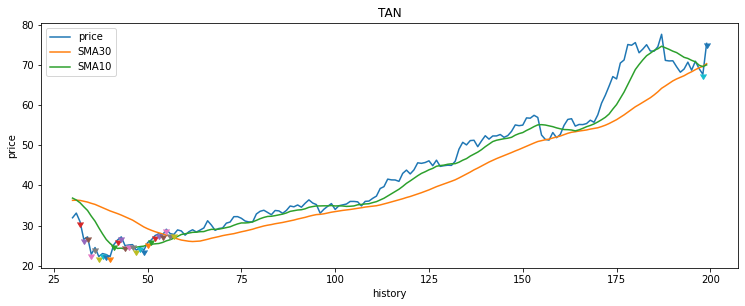

3.9705090774940808
43.363000024117646


In [174]:
date = date.iloc[30:]
#print(date)
#print(date.iloc[0])
#create ave move
SMA10 = pd.DataFrame()
SMA10 = Data.rolling(window=10).mean()
SMA30 = pd.DataFrame()
SMA30 = Data.rolling(window=30).mean()

#add column name
all_data = pd.DataFrame()
all_data = pd.concat((date,Data,SMA10,SMA30,(SMA10/SMA30-1)*100),axis=1, sort=False)
all_data.columns = ['date','price','10ave','30ave','10/30']
#print(all_data.iloc[30:])
#visualize the data
plt.figure(figsize=(12.5,4.5))
all_data = all_data.iloc[30:]
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(all_data)

plt.plot(Data.iloc[30:],label = 'price')
plt.plot(SMA30.iloc[30:],label = 'SMA30')
plt.plot(SMA10.iloc[30:],label = 'SMA10')
for index,row in all_data.iterrows():
    #print(index, row['10/30'])
    if row['10/30'] < 0:
        plt.plot(index,row['price'],marker=11)

plt.title(tker)
plt.xlabel('history')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.show()

print(np.mean(all_data['10/30']))
print(np.mean(all_data['10ave']))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


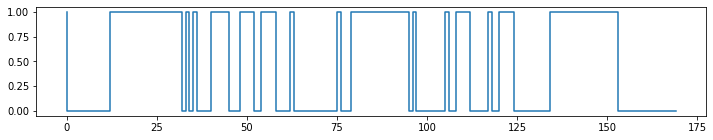

In [175]:
#climbing theory 
#starting from looking for up trend and down trend 
current_value = 0
current_state = 0
state = []
for value in all_data['10/30']:
    if value >= current_value:
        current_state = 1
    elif value < current_value:
        current_state = 0
    current_value = value
    state.append(current_state)
plt.figure(figsize=(12, 2))
plt.step(np.arange(len(state)),state)
print(state)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


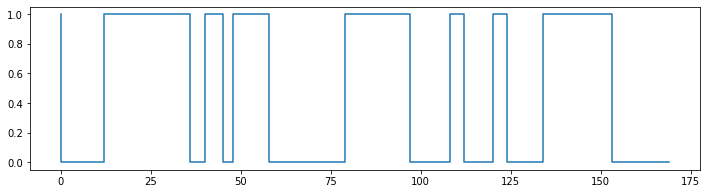

In [176]:
#create window based on the distance    
def create_win(window, distance):
    new_win = []
    for item in window:
        new_win += [item]*distance
    return new_win

def filter_data(data, distance):
    win_zero = [0,1,0]
    win_one = [1,0,1]
    win_zero = create_win(win_zero, distance)
    win_one = create_win(win_one, distance)
    for i in range(len(data)):
        if i <  distance:
            next
        if i == len(data):
            break
        if data[i-distance:i+distance+1*distance] == win_one:
            for n in range(distance):
                data[i+n] = 1
        elif data[i-distance:i+distance+1*distance] == win_zero:
            for n in range(distance):
                data[i+n] = 0
    return data

distance = 2
result = state
for n in range(1,distance+1):
    result = filter_data(result,n)

print(result)
#visualize
plt.figure(figsize=(12, 3))
plt.step(np.arange(len(result)),result)

In [177]:
#method to catch the last three days trend
#if 0,0,0,1,1 it will be a buy trend 

In [178]:
buy_win = [0,0,1]
#result = [0,0,1,1,0,0,0,1]
for i in range(len(result)):
    if i < 2:
        next
    if result[i-2:i+1] == buy_win:
        print(i, date.iloc[i]['date'])
        #print(i)


13 2020-03-26
41 2020-05-06
49 2020-05-18
80 2020-07-01
109 2020-08-12
121 2020-08-28
135 2020-09-18
